
## Data integration and feature selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Integration
The three datasets are integrated `breast_cancer_mean.csv`, `breast_cancer_se.csv`, `breast_cancer_worst.csv`, which represent the mean, standard error, and the largest (worst) values calculated from the original observations, respectively.

In [ ]:
from google.colab import files
uploaded = files.upload()
uploaded1 = files.upload()
uploaded2 = files.upload()
uploaded3 = files.upload()
import io
df_mean = pd.read_csv((io.BytesIO(uploaded['breast_cancer_mean.csv'])))
df_se = pd.read_csv((io.BytesIO(uploaded1['breast_cancer_se.csv'])))
df_worst = pd.read_csv((io.BytesIO(uploaded2['breast_cancer_worst.csv'])))
y = pd.read_csv((io.BytesIO(uploaded3['diagnosis.csv'])))


Saving breast_cancer_mean.csv to breast_cancer_mean.csv


Saving breast_cancer_se.csv to breast_cancer_se.csv


Saving breast_cancer_worst.csv to breast_cancer_worst.csv


Saving diagnosis.csv to diagnosis.csv


In [ ]:
# inner join
df_integrated0 = pd.merge(df_mean, df_se, left_index=True, right_index=True)
X= pd.merge(df_integrated0, df_worst, left_index=True, right_index=True)
X
print(X.shape)

(569, 30)


### Target variable encoding

In `y` (diagnosis), 'M' is malignant and 'B' is benign. The target column is integrated with digits as (1 - malignant, 0 - benign).

In [ ]:

y = y.replace({'M': 1, 'B': 0})
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


### Univariate feature selection
There are group of features that is present using the two techniques. The features are radius_mean, perieter_mean, area_mean, concavity_mean, concave points_mean, radius_worst, perimeter_worst, area_worst and symetry_worst. The corresponding mean and worst are the common subgroups.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


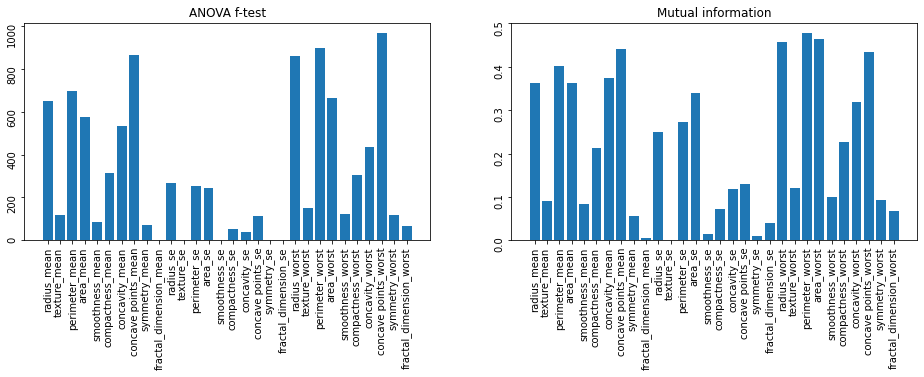

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
cols = X.columns
# feature selection
def select_features(X, y, score_function):
    # configure to select all features
    sel = SelectKBest(score_func=score_function, k='all') #k= no of high scoring features to be removed
    # learn relationship from training data
    sel.fit(X, y)
    return sel

# feature selection
fs = select_features(X, y, f_classif)
mi = select_features(X, y, mutual_info_classif)
# plot the scores
fig, axs = plt.subplots(1, 2, figsize=(16,4))
axs = axs.flatten()
axs[0].bar(cols, fs.scores_)
axs[0].tick_params(labelrotation=90)
axs[0].set_title('ANOVA f-test')
axs[1].bar(cols, mi.scores_)
axs[1].tick_params(labelrotation=90)
axs[1].set_title('Mutual information')
pyplot.show()

In [ ]:
Index(['radius_mean', 'concavity_mean', 'texture_se', 'radius_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst'],
      dtype='object')

### Univariate feature selection

After the intuition from the last task, we will start to select different sets of best features by different scoring functions and fit to models with cross validation. After, plot the distribution of accuracy of these combinations they should look like the one below:

6 combinations of scoring function and classifier are considered in total whose distribution of accuracy are plotted


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

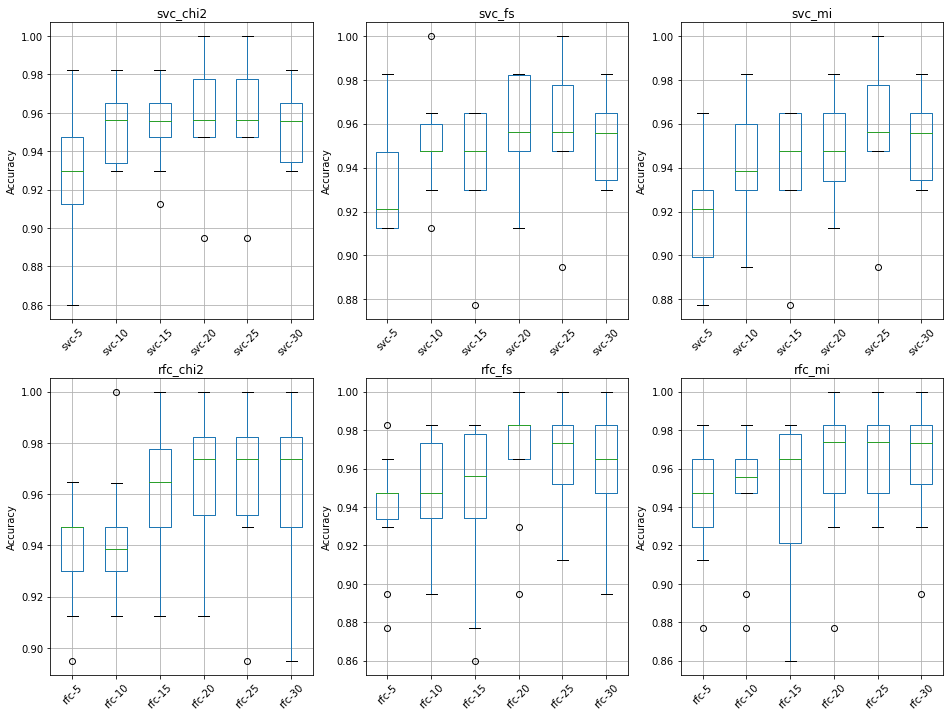

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest

sel = SelectKBest()
scaler = MinMaxScaler() # only for svm classification
rfc = RandomForestClassifier()
svc = SVC(kernel="linear")
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=321)

k_best = [5, 10, 15, 20, 25, 30]

# You must write your code starting from here

models = [svc, rfc]
models_names = ['svc', 'rfc']
scoring_func = [chi2, f_classif, mutual_info_classif]
direction = ['chi2', 'fs', 'mi']
fig, axs = plt.subplots(2, 3, figsize=(16,12))
axs = axs.flatten()
fig_idx = 0
for j in range(len(models)):  #model names
    results = {}
    for k in range(len(direction)): #scoring functions
        for i in range(len(k_best)):  #fig a x axis points
            sel = SelectKBest(score_func=scoring_func[k], k=k_best[i])
            X_sel = sel.fit_transform(X, y)
            cv = StratifiedKFold(n_splits=10)
            scores = cross_val_score(models[j], X_sel, y, scoring='accuracy', cv=10, n_jobs=-1)
            results[f'{models_names[j]}-{k_best[i]}'] = scores
        df_res = pd.DataFrame(results).copy()
        df_res.boxplot(rot=45, ax=axs[fig_idx])
        axs[fig_idx].set_title(f"{models_names[j]}_{direction[k]}");
        axs[fig_idx].set_ylabel("Accuracy")
        fig_idx+=1
plt.show()

### Recursive feature elimination 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

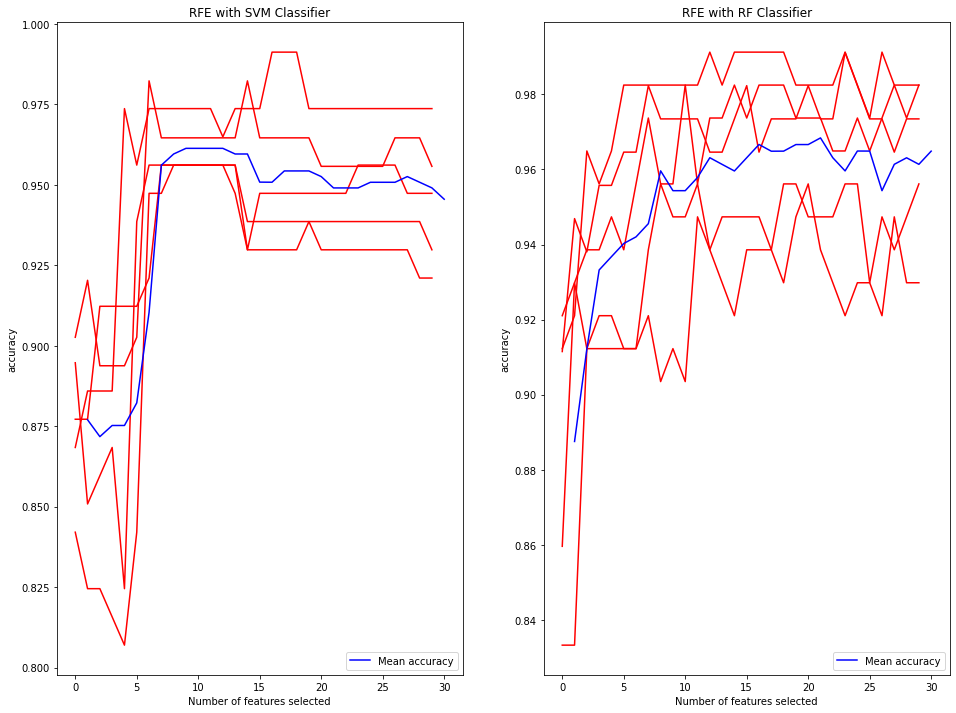

Optimal number of features of SVM : 9
Best features : Index(['radius_mean', 'concavity_mean', 'texture_se', 'radius_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst'],
      dtype='object')


In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

fig, axs = plt.subplots(1, 2, figsize=(16,12))
axs = axs.flatten()

rfc = RandomForestClassifier()
svc = SVC(kernel="linear")
min_features_to_select = 1

rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=min_features_to_select
)
#rfecv.fit_transform(X, y)
#X = X.values
#y = y.values

rfecv.fit_transform(X, y)

# Plot number of features VS. cross-validation scores
#plt.figure()
axs[0].set_title("RFE with SVM Classifier")
axs[0].set_xlabel("Number of features selected")
axs[0].set_ylabel("accuracy")
axs[0].plot(rfecv.grid_scores_,color='r')
axs[0].plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.cv_results_['mean_test_score'],color='b',label='Mean accuracy')
axs[0].legend(loc="lower right")
#axs[0].plot(np.mean(rfecv.grid_scores_,),color='b',label='Mean accuracy')


rfecv1 = RFECV(

    estimator=rfc,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=1
)
rfecv1.fit_transform(X, y)

axs[1].set_title("RFE with RF Classifier")
axs[1].set_xlabel("Number of features selected")
axs[1].set_ylabel("accuracy")
axs[1].plot(rfecv1.grid_scores_,color='r')
axs[1].plot(range(1, len(rfecv1.grid_scores_) + 1), rfecv1.cv_results_['mean_test_score'],color='b',label='Mean accuracy')
axs[1].legend(loc="lower right")
plt.show()
print("Optimal number of features of SVM : %d" % rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])